In [2]:
import os
import cv2
import numpy as np
from skimage.restoration import wiener
import matplotlib.pyplot as plt

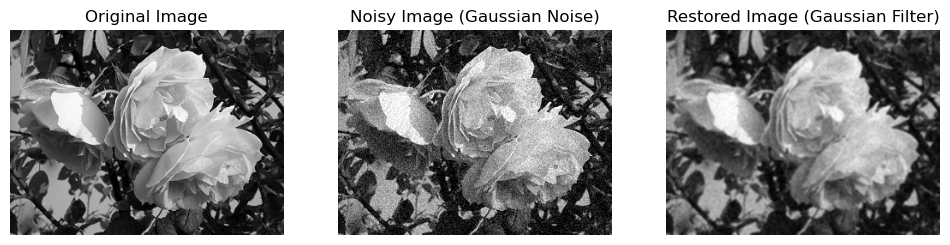

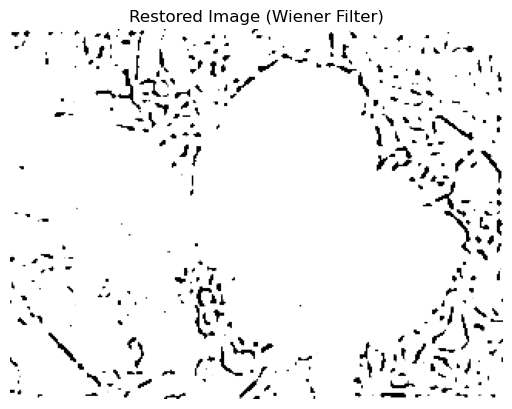

In [4]:
# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, sigma=20):
    noise = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = cv2.add(image.astype(np.float32), noise)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Load the image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')
#image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')

# Load the original image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Simulate degradation: add Gaussian noise
noisy_image = add_gaussian_noise(image)

# Restoration Method 1: Gaussian Blurring
restored_gaussian = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# Restoration Method 2: Wiener Filter
# Define a simple point spread function for Wiener filtering
psf = np.ones((5, 5)) / 25
restored_wiener = wiener(noisy_image, psf, balance=0.1)

# Display the original, noisy, and restored images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Noisy Image (Gaussian Noise)")
plt.imshow(noisy_image, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Restored Image (Gaussian Filter)")
plt.imshow(restored_gaussian, cmap="gray")
plt.axis("off")

plt.show()

# Display Wiener restored image separately
plt.figure()
plt.title("Restored Image (Wiener Filter)")
plt.imshow(restored_wiener, cmap="gray")
plt.axis("off")
plt.show()
